In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# загружаем данные по ppp,  валюте и континенту

# здесь лежат данные с плохими цифрами, но их легко достать по URL
# url_gdp = 'https://raw.githubusercontent.com/datasets/ppp/master/data/ppp-gdp.csv'
# gdf_df = pd.read_csv(url_gdp,  on_bad_lines='skip')
# gdf_df = gdf_df[gdf_df['Year'] == 2020]
# gdf_df['Country'] = gdf_df['Country'].apply(str.upper)
# gdf_df.replace({'CZECH REPUBLIC': 'CZECHIA'}, inplace=True)

gdf_df = pd.read_csv('PPP.csv', sep=',', on_bad_lines='skip')
gdf_df = gdf_df[['Country Name', '2019 [YR2019]', 'Country Code']].dropna()
gdf_df.rename(columns= {'Country Name': 'Country', '2019 [YR2019]': 'PPP'}, inplace=True)
gdf_df['Country'] = gdf_df['Country'].apply(str.upper)
gdf_df.replace({'CZECH REPUBLIC': 'CZECHIA'}, inplace=True)
gdf_df['PPP'] = gdf_df['PPP'].replace('..', None).apply(float)

currancy_codes_df = pd.read_csv('https://datahub.io/core/currency-codes/r/codes-all.csv')[['Entity','AlphabeticCode', 'Currency']]
currancy_codes_df.columns = ['Country', 'CurrancyCode', 'Currency']
currancy_codes_df = currancy_codes_df.drop_duplicates(['Country'])

continents_df = pd.read_csv('https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv')
continents_df['Country'] = continents_df['Country'].apply(str.upper)
continents_df.replace({'CZ': 'CZECHIA'}, inplace=True)


In [4]:
# загружаем датасет с kaggle

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

# file_name = 'netflix%20price%20in%20different%20countries.csv'
file_name='Netflix%20subscription%20fee%20Dec-2021.csv'
api.dataset_download_file('prasertk/netflix-subscription-price-in-different-countries', file_name=file_name,  path='data/')

fees_df = pd.read_csv('./data/' + file_name )
fees_df.rename(columns= {'Country_code': 'Country Code'}, inplace=True)
fees_df['Country'] = fees_df['Country'].apply(str.upper)
fees_df.replace({'RUSSIA': 'RUSSIAN FEDERATION'}, inplace=True)



In [5]:
df = (fees_df
      .merge(continents_df)
      .merge(currancy_codes_df)
      .merge(gdf_df[['Country', 'PPP']])
     )

Построить график корреляции между средним доходом (PPP) и ценой подписки

Text(0.5, 1.0, 'Correlation: 0.530')

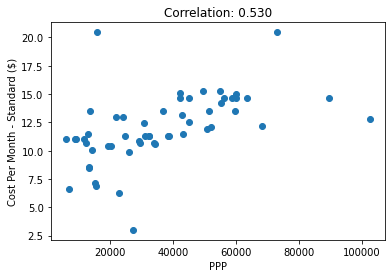

In [6]:
plt.scatter((df['PPP']), df['Cost Per Month - Standard ($)'])
plt.xlabel('PPP')
plt.ylabel('Cost Per Month - Standard ($)')
plt.title(f"Correlation: {np.corrcoef((df['PPP']), df['Cost Per Month - Standard ($)'])[0][1]:.3f}")

Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны. 


In [7]:
df.groupby(['CurrancyCode', 'Currency'])[['Cost Per Month - Basic ($)', 
                            'Cost Per Month - Standard ($)', 
                            'Cost Per Month - Premium ($)']].mean().sort_values('Cost Per Month - Premium ($)')

,,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
CurrancyCode,Currency,,,
TRY,Turkish Lira,1.970000,3.000,4.020000
INR,Indian Rupee,2.640000,6.610,8.600000
ARS,Argentine Peso,3.740000,6.300,9.260000
COP,Colombian Peso,4.310000,6.860,9.930000
BRL,Brazilian Real,4.610000,7.110,9.960000
PEN,Sol,6.110000,8.560,11.010000
UAH,Hryvnia,5.640000,8.460,11.290000
THB,Baht,8.340000,10.430,12.520000
ZAR,Rand,6.260000,10.050,12.580000


Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента


In [8]:
df.groupby(['Continent'])[['Cost Per Month - Basic ($)', 
                            'Cost Per Month - Standard ($)', 
                            'Cost Per Month - Premium ($)']].mean().sort_values('Cost Per Month - Premium ($)')

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Continent,,,
South America,6.566667,9.466667,12.395556
Africa,6.260000,10.050000,12.580000
Asia,7.392222,10.353333,13.086667
North America,7.900000,11.454000,14.648000
Oceania,8.320000,12.325000,16.665000
Europe,9.334483,13.484828,17.831379


Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?


In [9]:
df_czk = df[df['Country'] == 'CZECHIA']
df_czk[['Cost Per Month - Basic ($)', 
              'Cost Per Month - Standard ($)', 
              'Cost Per Month - Premium ($)']] / df_czk['PPP'].iloc[0]

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
12,0.000204,0.000265,0.000327


Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?

In [10]:
df.sort_values('Total Library Size', ascending=False).head(5)['Country'].values

array(['CZECHIA', 'HUNGARY', 'BULGARIA', 'IRELAND', 'LITHUANIA'],
      dtype=object)

Какой процент среднего дохода россиянина будет составлять подписка Netflix?

In [11]:
(df[df['Country'] == 'RUSSIAN FEDERATION']['Cost Per Month - Standard ($)']
 / df[df['Country'] == 'RUSSIAN FEDERATION']['PPP']).values[0] * 100

0.037137463299604975

На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)


In [12]:
df['cpt'] = df['Cost Per Month - Standard ($)'] / df['Total Library Size']
df = df.loc[df.cpt.argsort()[::-1]].reset_index(drop=True)
print('Russia rank:', df[df['Country'] == 'RUSSIAN FEDERATION'].index.values[0])

Russia rank: 39


В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

In [13]:
print('Best for VPN:', df.sort_values('Cost Per Month - Standard ($)')['Country'].values[0])

Best for VPN: TURKEY
